In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
from matplotlib import colors

In [2]:
pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv("bestsellers with categories 2.csv")

In [8]:
df.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [9]:
df.describe()

User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000

In [11]:
df.shape

(550, 7)

In [12]:
df.nunique()

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [13]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [18]:
df.rename(columns={"User Rating":"User_rating"},inplace = True)

In [19]:
df.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User_rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [20]:
df.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The Very Hungry Caterpillar                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
                                                                                ..
Humans of New York : Stories                                                     1
Howard Stern Comes Again                                                         1
Homebody: A Guide to Creating Spaces You Never Want to Leave                     1
Have a Little Faith: A True Story                                                1
Night (Night)                                                                    1
Name: Name, Length: 351, dtype: int64

In [21]:
df.User_rating.value_counts()

4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: User_rating, dtype: int64

In [22]:
df.Reviews.value_counts()

8580     10
5069      9
21834     8
19546     7
19576     6
         ..
5272      1
3776      1
1930      1
13471     1
5680      1
Name: Reviews, Length: 346, dtype: int64

In [23]:
df.Price.value_counts()

8      52
6      38
9      38
5      36
11     35
4      32
14     30
13     29
10     28
12     27
7      23
15     21
16     20
17     19
20     17
18     14
0      12
46     10
21      9
22      6
28      6
24      5
23      5
2       5
40      5
30      5
19      4
27      4
32      2
25      2
105     2
52      1
54      1
3       1
39      1
53      1
1       1
36      1
82      1
42      1
Name: Price, dtype: int64

In [24]:
df.Genre.value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

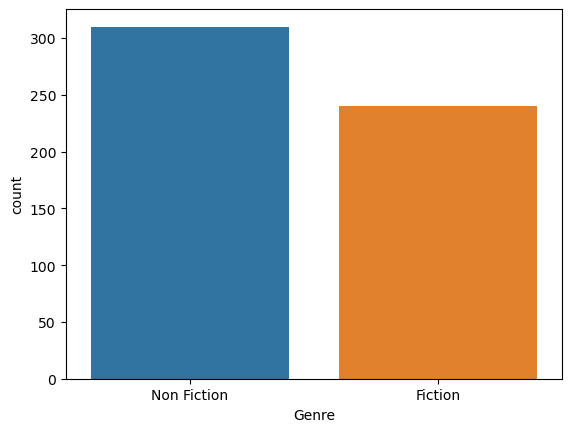

In [25]:
#df.Genre.hist()
sns.countplot(
    data=df, x =df['Genre']

)
plt.show()

In [27]:
us_series_data=df[df['Genre']=='Non Fiction']
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_rating'],fill_color='Magenta'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['User_rating']],fill_color='thistle'))
                     ])
fig.show()

In [28]:
us_series_data=df[df['Genre']=='Fiction']
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Author', 'User_rating'],fill_color='light gray'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['User_rating']],fill_color='light blue'))
                     ])
fig.show()

In [29]:
dfd1 = df[df['Author']== 'Jeff Kinney']
dfd2 = df[df['Author']== 'Gary Chapman']
dfd3 = df[df['Author']== 'Rick Riordan']
dfd4 = df[df['Author']== 'Suzanne Collins']

redf1 = dfd1["Genre"].value_counts()[:10].reset_index()
redf2 = dfd2['Genre'].value_counts()[:10].reset_index()
redf3 = dfd3['Genre'].value_counts()[:10].reset_index()
redf4 = dfd4['Genre'].value_counts()[:10].reset_index()


fig = go.Figure()

fig.add_trace(go.Bar(x = redf1["index"],
                     y = redf1["Genre"],
                     marker = dict(color = 'yellow'),
                     name = 'Jeff Kinneyt'))

fig.add_trace(go.Bar(x = redf2['index'],
                     y = redf2['Genre'],
                     name = 'Gary Chapman',
                     marker = dict(color = 'blue')))

fig.add_trace(go.Bar(x = redf3['index'],
                     y = redf3['Genre'],
                     name = 'Rick Riordan',
                     marker = dict(color = 'green')))

fig.add_trace(go.Bar(x = redf4['index'],
                     y = redf4['Genre'],
                     name = 'Suzanne Collins',
                     marker = dict(color = 'magenta')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            direction="down", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.13, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 
                dict(label="All", 
                     method="update", 
                     args=[ {"visible": [True, True, True,True]}, 
                            {'showlegend' : True} 
                        ]),
                dict(label="Jeff Kinney", 
                     method="update", 
                     args=[ {"visible": [True, False, False,False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Gary Chapman', 
                     method="update", 
                     args=[ {"visible": [False, True, False,False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Rick Riordan', 
                     method="update", 
                     args=[ {"visible": [False, False, True,False]}, 
                            {'showlegend' : True} 
                        ]),  
                dict(label='Suzanne Collins', 
                     method="update", 
                     args=[ {"visible": [False, False,False,True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=2, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'Cyan'))])

fig.update_layout(title ="Author and Genre",
                  title_x = 0.5,
                  title_font = dict(size = 30, color = 'Cyan'))

fig.show()

In [31]:
dfp = df['User_rating'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfl = df['Price'].value_counts().head(10).sort_values(ascending = True).reset_index()
dfc = df['Year'].value_counts().head(10).sort_values(ascending = True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x = dfp['User_rating'],
                     y = dfp['index'],
                     orientation='h',
                     name = 'User_Rating',
                     marker = dict(color = 'purple')))

fig.add_trace(go.Bar(x = dfl['Price'],
                     y = dfl['index'],
                     orientation='h',
                     name = 'Price',
                     marker = dict(color = 'CadetBlue')))

fig.add_trace(go.Bar(x = dfc['Year'],
                     y = dfc['index'],
                     orientation='h',
                     name = 'Year',
                     marker = dict(color = 'pink')))

fig.update_layout( 
    updatemenus=[ 
        dict( 
            type = "buttons",
            direction="left", 
            pad={"r": 10, "t": 10},
            showactive=True, 
            x=0.16, 
            xanchor="left",
            y=1.12, 
            yanchor="top",
            font = dict(color = 'Indigo',size = 14),
            buttons=list([ 

                dict(label="User_rating", 
                     method="update", 
                     args=[ {"visible": [True, False, False]}, 
                            {'showlegend' : True} 
                        ]), 
                dict(label='Price', 
                     method="update", 
                     args=[ {"visible": [False, True, False]}, 
                            {'showlegend' : True} 
                     ]), 
                dict(label='Year', 
                     method="update", 
                     args=[ {"visible": [False, False, True]}, 
                            {'showlegend' : True}]),
            ]),
        )])

fig.update_layout(
    annotations=[
        dict(text="Choose:", showarrow=False,
             x=0, y=1.075, yref="paper", align="right",
             font=dict(size=16,color = 'DarkSlateBlue'))])

fig.update_layout(title ="EDA_Amazon_Top_Bestselling_Books(User_rating,Price,Reviews)",
                  title_x = 0.5,
                  title_font = dict(size = 20, color = 'MidnightBlue'))

fig.show()

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


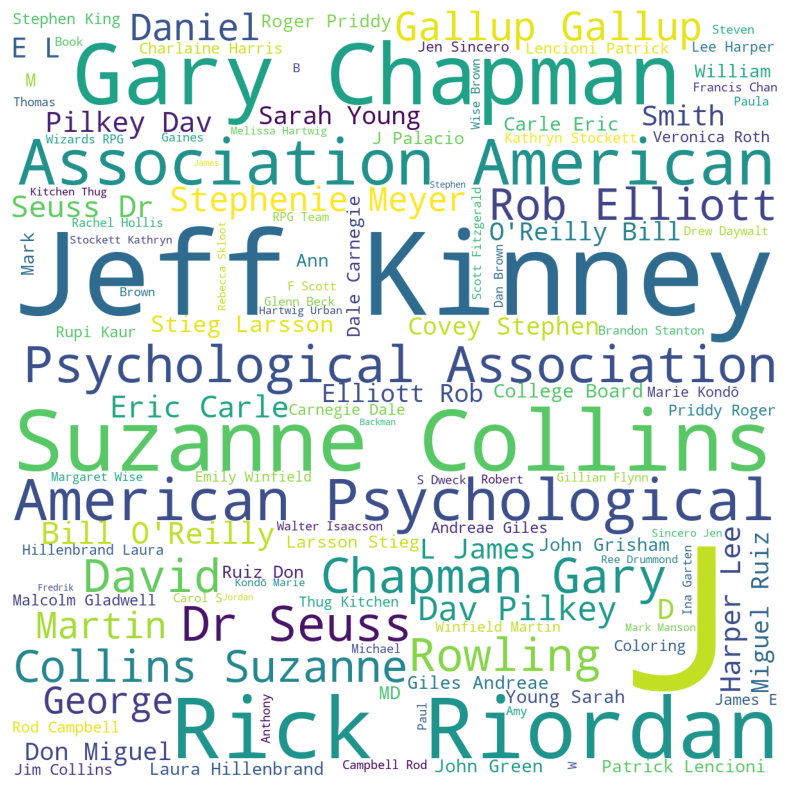

In [40]:
#color_list=  ['DarkBlue','Teal','LightBlue','black','pink','Orange','red','blue','purple']

#colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (10,10)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 1200 ,
                       max_words = 120).generate(" ".join(df['Author']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

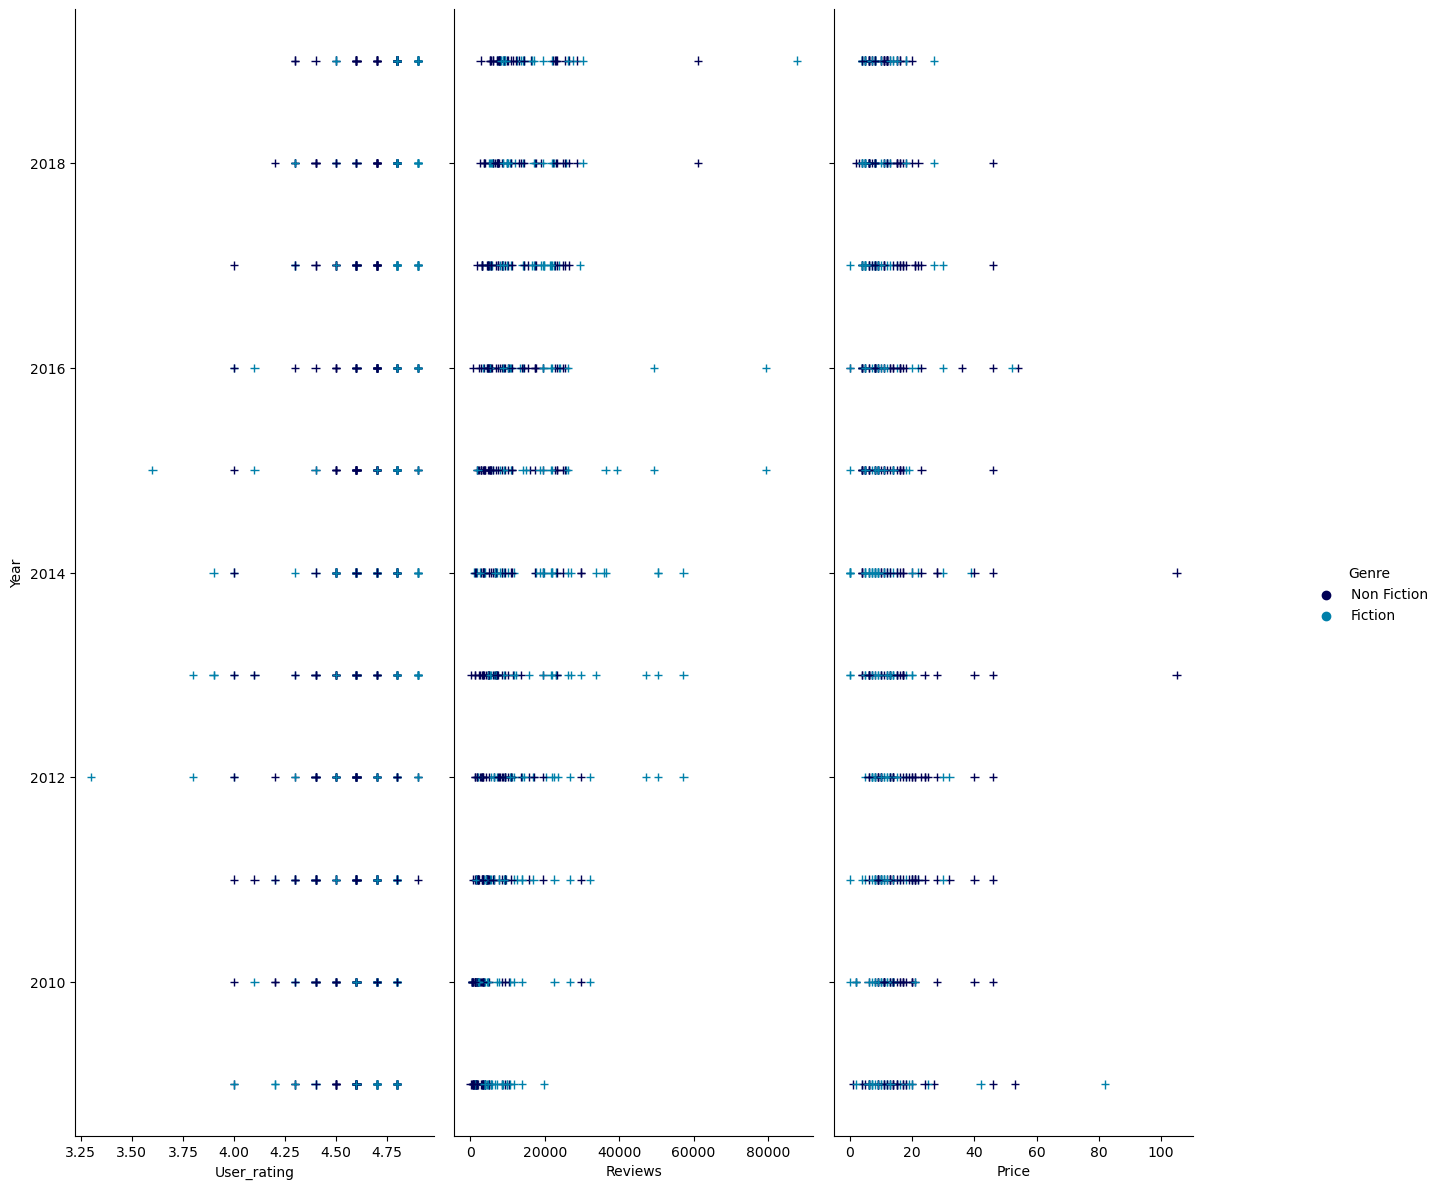

In [42]:
g=sns.pairplot(
    df,
    x_vars=["User_rating", "Reviews", "Price"],
    y_vars=["Year"],    plot_kws=dict(marker="+", linewidth=1),
    palette="ocean", hue="Genre"
)
g.fig.set_size_inches(15,15)
plt.show()

In [43]:
df.Author.value_counts()

Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: Author, Length: 248, dtype: int64

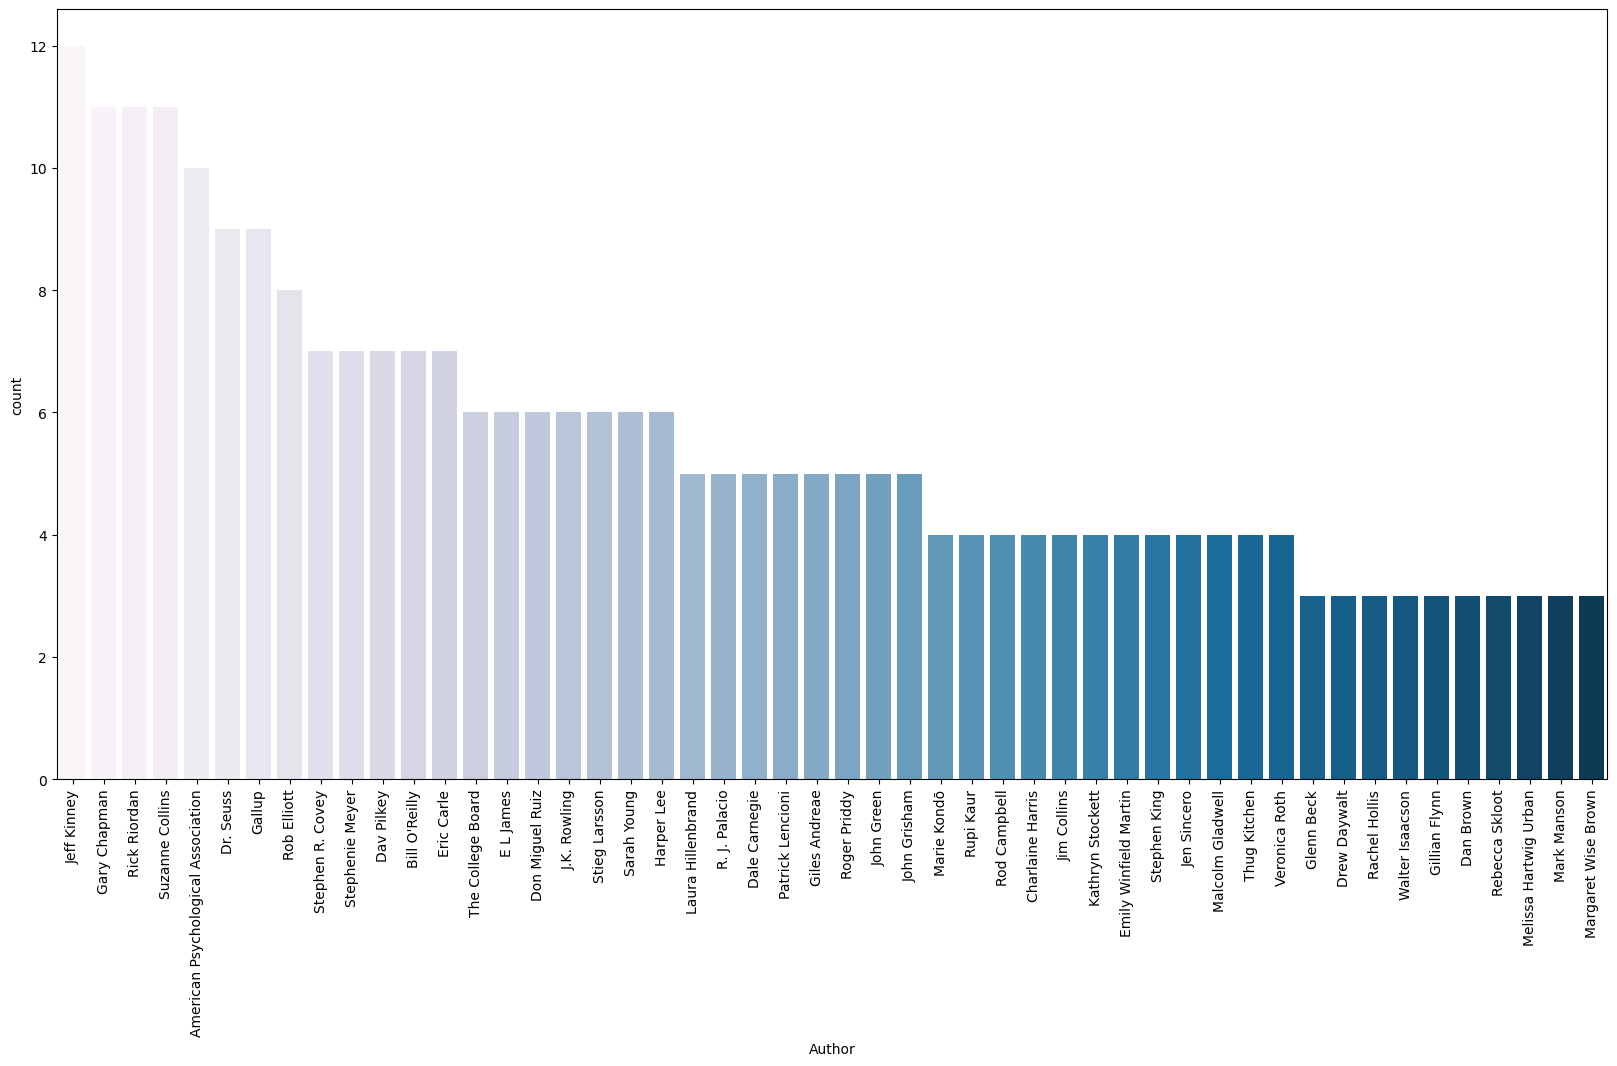

In [44]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['Author'] ,palette='PuBu',order=df['Author'].value_counts().index[0:50])
plt.show()

In [47]:
p=df.Name[df.User_rating==4.9]
p

40              Brown Bear, Brown Bear, What Do You See?
41              Brown Bear, Brown Bear, What Do You See?
81     Dog Man and Cat Kid: From the Creator of Capta...
82     Dog Man: A Tale of Two Kitties: From the Creat...
83     Dog Man: Brawl of the Wild: From the Creator o...
84     Dog Man: Brawl of the Wild: From the Creator o...
85     Dog Man: Fetch-22: From the Creator of Captain...
86     Dog Man: For Whom the Ball Rolls: From the Cre...
87     Dog Man: Lord of the Fleas: From the Creator o...
146    Goodnight, Goodnight Construction Site (Hardco...
147    Goodnight, Goodnight Construction Site (Hardco...
151                             Hamilton: The Revolution
153    Harry Potter and the Chamber of Secrets: The I...
155    Harry Potter and the Goblet of Fire: The Illus...
156    Harry Potter and the Prisoner of Azkaban: The ...
157    Harry Potter and the Sorcerer's Stone: The Ill...
174                         Humans of New York : Stories
187    Jesus Calling: Enjoying 

In [49]:
a=df.sort_values(by="User_rating",ascending=False) #viewCount goes from highest to lowest.
a

Name         Author  \
431                                 The Magnolia Story    Chip Gaines   
87   Dog Man: Lord of the Fleas: From the Creator o...     Dav Pilkey   
85   Dog Man: Fetch-22: From the Creator of Captain...     Dav Pilkey   
84   Dog Man: Brawl of the Wild: From the Creator o...     Dav Pilkey   
83   Dog Man: Brawl of the Wild: From the Creator o...     Dav Pilkey   
..                                                 ...            ...   
22                                           Allegiant  Veronica Roth   
107  Fifty Shades of Grey: Book One of the Fifty Sh...      E L James   
106  Fifty Shades of Grey: Book One of the Fifty Sh...      E L James   
132                         Go Set a Watchman: A Novel     Harper Lee   
353                                 The Casual Vacancy   J.K. Rowling   

     User_rating  Reviews  Price  Year        Genre  
431          4.9     7861      5  2016  Non Fiction  
87           4.9     5470      6  2018      Fiction  
85           4.9    12619      8  2019      Fiction  
84           4.9     7235      4  2019      Fiction  
83           4.9     7235      4  2018      Fiction  
..           ...      ...    ...   ...          ...  
22           3.9     6310     13  2013      Fiction  
107          3.8    47265     14  2013      Fiction  
106          3.8    47265     14  2012      Fiction  
132          3.6    14982     19  2015      Fiction  
353          3.3     9372     12  2012      Fiction  

[550 rows x 7 columns]

In [50]:
a.Name.value_counts()

Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
What Pet Should I Get? (Classic Seuss)                                           1
What If?: Serious Scientific Answers to Absurd Hypothetical Questions            1
Uninvited: Living Loved When You Feel Less Than, Left Out, and Lonely            1
Twilight (The Twilight Saga, Book 1)                                             1
The Casual Vacancy                                                               1
Name: Name, Length: 351, dtype: int64

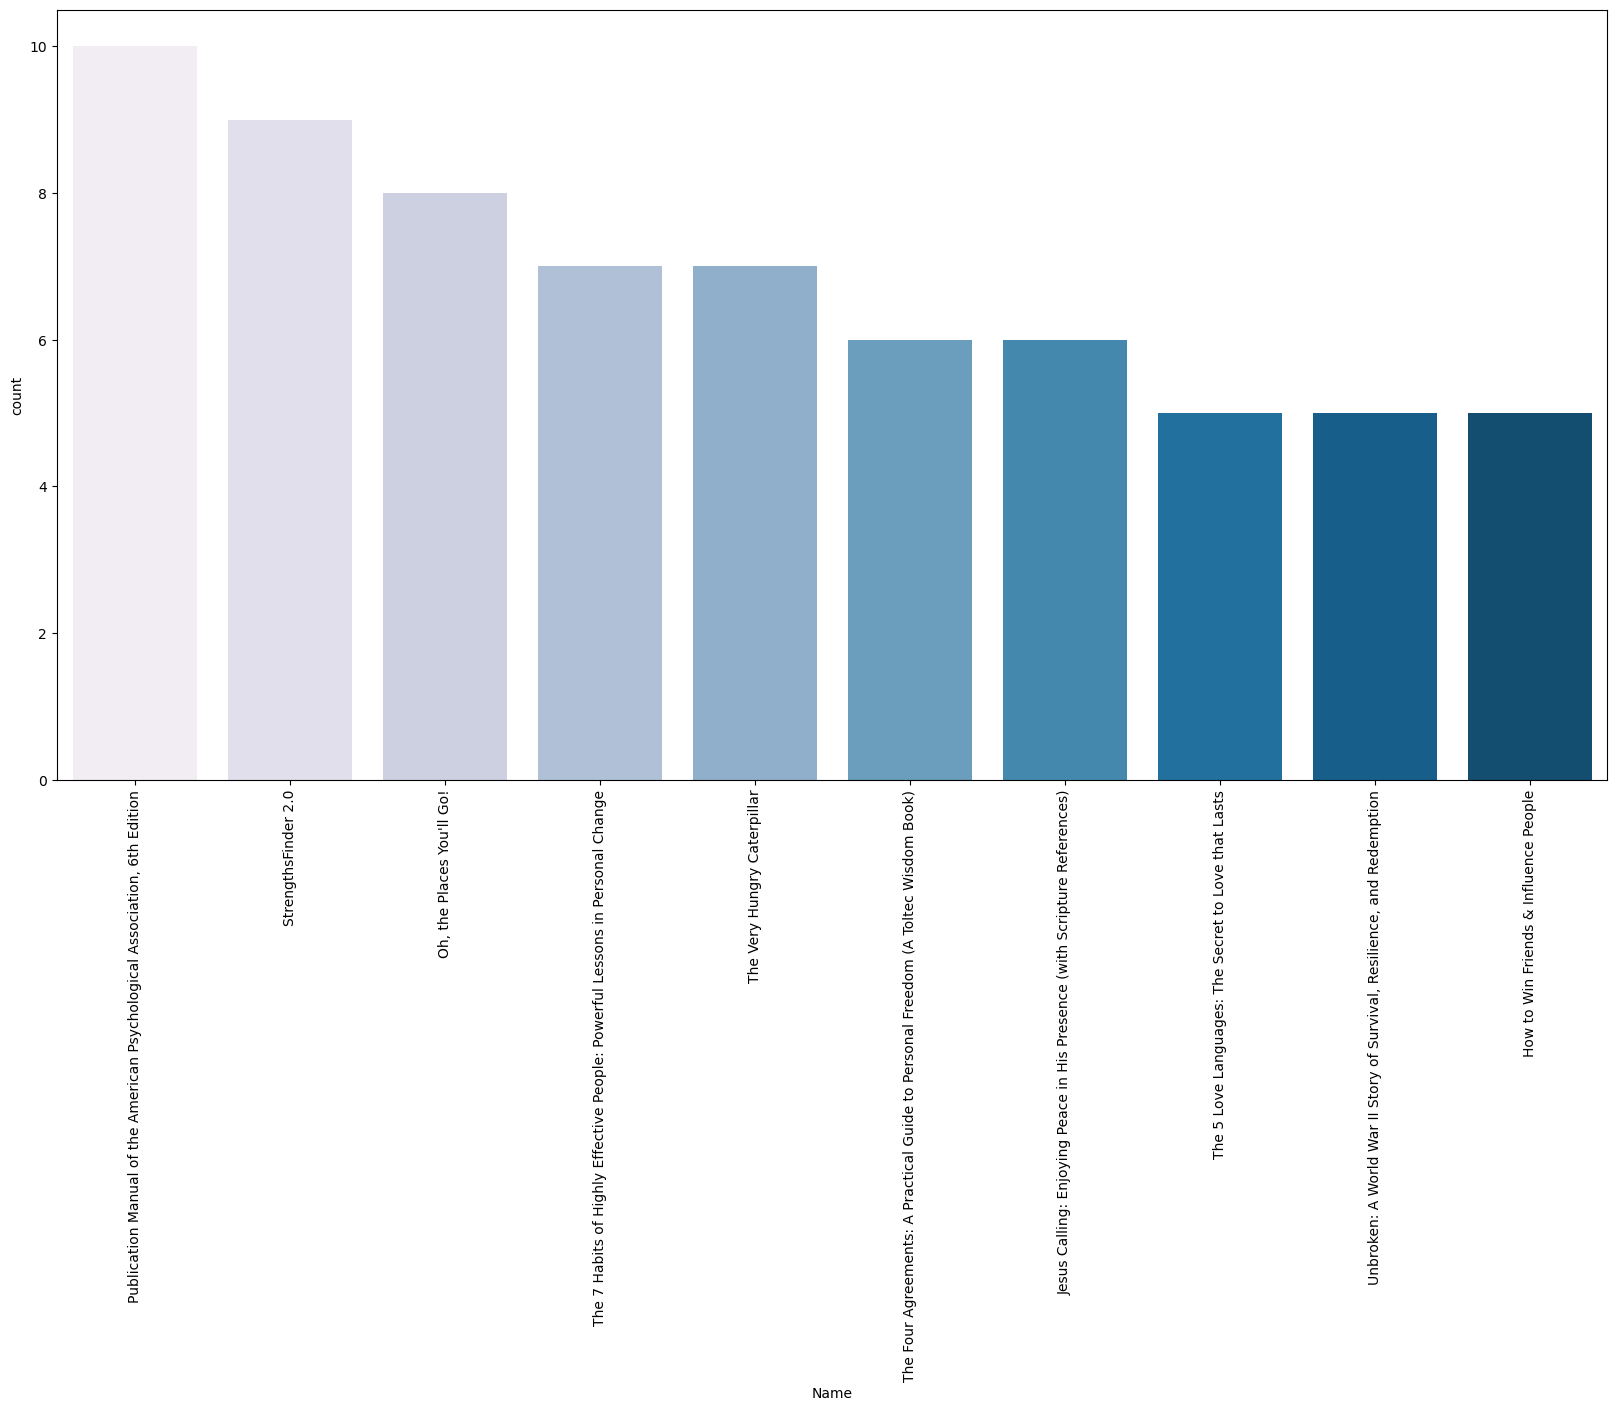

In [51]:
plt.figure(figsize=(20 ,10 ))
plt.xticks(rotation=90)
sns.countplot(data = a , x =a['Name'] ,palette='PuBu',order=a['Name'].value_counts().index[0:10])
plt.show()

In [53]:
oldest_us_series=df.sort_values(by='User_rating',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'User_rating'],fill_color='cyan'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='light blue'))
                     ])
fig.show()

<Axes: >

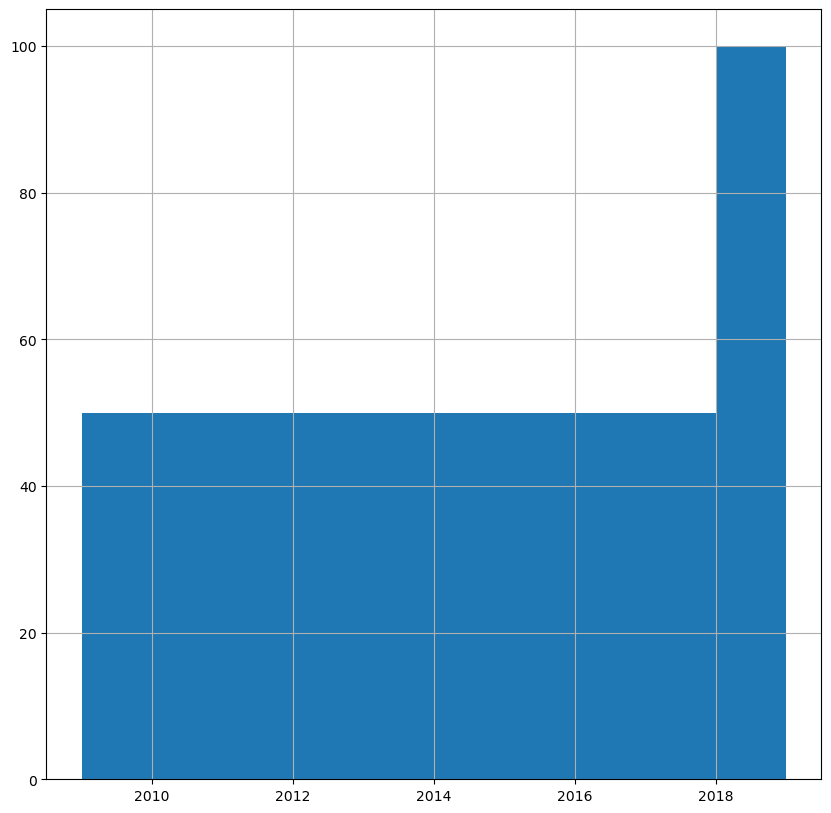

In [54]:
df.Year.hist()

In [55]:
df.head()

Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User_rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction

In [56]:
oldest_us_series=df.sort_values(by='Reviews',ascending=False)[0:550]

fig = go.Figure(data=[go.Table(header=dict(values=['Name', 'Reviews'],fill_color='lightsalmon'),
                 cells=dict(values=[oldest_us_series['Name'],oldest_us_series['Reviews']],fill_color='light blue'))
                     ])
fig.show()

In [58]:
us_series_data=df[df['Year']==2009]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [60]:
us_series_data=df[df['Year']==2010]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [62]:
us_series_data=df[df['Year']==2011]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [64]:
us_series_data=df[df['Year']==2012]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [66]:
us_series_data=df[df['Year']==2013]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [67]:
us_series_data=df[df['Year']==2014]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [68]:
us_series_data=df[df['Year']==2015]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [69]:
us_series_data=df[df['Year']==2016]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [70]:
us_series_data=df[df['Year']==2017]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [71]:
us_series_data=df[df['Year']==2018]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()

In [72]:
us_series_data=df[df['Year']==2019]
oldest_us_series=us_series_data.sort_values(by='User_rating',ascending=False)[0:50]

fig = go.Figure(data=[go.Table(header=dict(values=['Author',"Name","User_rating"],fill_color='yellow'),
                 cells=dict(values=[oldest_us_series['Author'],oldest_us_series['Name'],oldest_us_series['User_rating']],fill_color='lightgoldenrodyellow'))
                     ])
fig.show()